In [1]:
import umap
import numpy as np
import pandas as pd

import jscatter 

import matplotlib.pyplot as plt

import humap
from datasets import load_dataset

import time



In [2]:
# N = 200000 #600_000

# indices = np.random.choice(744469, N, replace=False).tolist()
# print("loading dataset")
# sentence_embeddings = np.load("gpt4all-j-prompts.npy")[indices]
# print(sentence_embeddings.shape)

In [3]:
# groovy = load_dataset('nomic-ai/gpt4all-j-prompt-generations', revision='v1.3-groovy')

# docs = groovy['train']['prompt']

# documents = []
# for i in range(len(indices)):
#     documents.append(docs[indices[i]])
# del docs



In [19]:
# datasets consisting of prompts
# dataset = pd.read_csv('./../datasets/gpt4all-prompts.csv')
dataset = pd.read_csv('./../datasets/augmented_reviews.csv')
documents = dataset['review']

# sentence_embeddings = np.load("./../datasets/gpt4all-prompts.npy")
sentence_embeddings = np.load('./../datasets/reviews_embeddings.npy')

# N = sentence_embeddings.shape[0]
sentence_embeddings.shape

/var/folders/0q/nn_4qj3j3zv2g4nt8jnxdhgw0000gn/T/ipykernel_83767/1843453994.py:3: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('./../datasets/augmented_reviews.csv')


(5144462, 384)

In [20]:
dataset.head()

,review,id,file,disability,app_name,reviewed
0,Add bhoot hai yar,14862626,./reviews-part01/com.google.android.youtube/co...,NaN,NaN,0
1,Best app hai good updates for YouTube,14862698,./reviews-part01/com.google.android.youtube/co...,NaN,NaN,0
2,Well it's all you could need in this app but[c...,14862708,./reviews-part01/com.google.android.youtube/co...,NaN,NaN,0
3,Latest update is an absolute disaster. Every t...,14862753,./reviews-part01/com.google.android.youtube/co...,NaN,NaN,0
4,*PLEASE ADD DARK MODE ON ANDROID MY EYES BURN*,14862793,./reviews-part01/com.google.android.youtube/co...,NaN,NaN,0


In [22]:
N = int(sentence_embeddings.shape[0]*0.01)

indices_pivot = np.random.choice(indices_df['indices'].shape[0], N, replace=False).tolist()
print("size:", N)
indices_df = pd.read_csv('filtered_indices.csv')
print(indices_df.shape)
indices = indices_df.loc[indices_pivot]['indices'].values.tolist()
print('indices before:', len(indices))
indices += dataset[dataset['reviewed'] == 1].index.values.tolist()
print('indices after:', len(indices))

print("passou")
documents = documents.values[indices]
print("passou")
sentence_embeddings = sentence_embeddings[indices]
print("passou")
reviewed = dataset['reviewed'].values[indices]

size: 51444
(1403644, 1)
indices before: 51444
indices after: 56443
passou
passou
passou


In [23]:
sentence_embeddings.shape

(56443, 384)

In [7]:
from sklearn.decomposition import PCA

sentence_embeddings = PCA(random_state=0, n_components=.9).fit_transform(sentence_embeddings)
sentence_embeddings.shape

(1408643, 204)

In [39]:
from sklearn.preprocessing import normalize

In [47]:
print("creating humap object")
hUmap = humap.HUMAP(np.array([0.2, 0.2]), init="Random")

print("fitting hierarchy")
tic = time.time()
y = np.zeros(sentence_embeddings.shape[0])
hUmap.fit(sentence_embeddings, dataset['reviewed'].values)
toc = time.time()



creating humap object
fitting hierarchy
Level 0 with 56443 data samples.
Fitting the first hierarchy level... 

L0 - Fitting: done in 27.950653 seconds.

Level 1: 11288 data samples.
Computing random walks for sampling selection... 


L1 - Selecting Landmarks: done in 0.145416 seconds.

Computing random walks for constucting representation neighborhood... 


L1 - Constructing Neighborhood: done in 4.391245 seconds.

Computing similarity among landmarks... 

Similarity between landmarks: 0.265200 seconds.

Computing sparse similarity... 

Creating sparse matrix... 


L1 - Sparse Similarity: done in 0.180860 seconds.

Fitting the hierarchy level... 


L1 - Fitting: done in 0.189053 seconds.

Associating data points to landmarks... 


L1 - Performing association to landmarks: done in 0.013863 seconds.


L1 - Construction: done in 5.344991


Level 2: 2257 data samples.
Computing random walks for sampling selection... 


L2 - Selecting Landmarks: done in 0.028798 seconds.

Computing random 

In [48]:
embedding2 = hUmap.transform(2)

Initiating low-dimensional representation...

done in 0.002223 seconds.

Embedding level 2 with 2257 data samples.


	completed 0/500 epochs

	completed 50/500 epochs

	completed 100/500 epochs

	completed 150/500 epochs

	completed 200/500 epochs

	completed 250/500 epochs

	completed 300/500 epochs

	completed 350/500 epochs

	completed 400/500 epochs

	completed 450/500 epochs

	completed 500 epochs


EMBEDDING: Done in1.253874seconds.



In [11]:
hUmap.set_fixing_term(0.01)
hUmap.fix_datapoints(embedding2)
embedding1 = hUmap.transform(1)

Initing low-dimensional representation... returning noise object
done in 0.076672 seconds.
Embedding level 1 with 281728 data samples.


	completed 0 / 500 epochs
	completed 50 / 500 epochs
	completed 100 / 500 epochs
	completed 150 / 500 epochs
	completed 200 / 500 epochs
	completed 250 / 500 epochs
	completed 300 / 500 epochs
	completed 350 / 500 epochs
	completed 400 / 500 epochs
	completed 450 / 500 epochs
	completed 500 epochs

It took 226.412 to embed.


In [12]:
hUmap.set_fixing_term(0.01)
hUmap.fix_datapoints(embedding1)
embedding = hUmap.transform(0)

Initing low-dimensional representation... returning noise object
done in 0.398793 seconds.
Embedding level 0 with 1408643 data samples.


	completed 0 / 500 epochs
	completed 50 / 500 epochs
	completed 100 / 500 epochs
	completed 150 / 500 epochs
	completed 200 / 500 epochs
	completed 250 / 500 epochs
	completed 300 / 500 epochs
	completed 350 / 500 epochs
	completed 400 / 500 epochs
	completed 450 / 500 epochs
	completed 500 epochs

It took 7055.92 to embed.


In [49]:
original_indices2 = hUmap.original_indices(2)

In [14]:
original_indices1 = hUmap.original_indices(1)

In [50]:
documents2 = []
for i in range(len(original_indices2)):
    documents2.append(documents[original_indices2[i]])


In [16]:
documents1 = []
for i in range(len(original_indices1)):
    documents1.append(documents[original_indices1[i]])


In [17]:
# import hdbscan
# import seaborn as sns

# from sklearn.cluster import KMeans

In [18]:
# clusterer = hdbscan.HDBSCAN(min_cluster_size=100, min_samples=15)
# # clusterer = KMeans(n_clusters=10)
# clusterer.fit(embedding)





In [51]:
df2 = pd.DataFrame({   
    'id': np.arange(len(embedding2)),
    'x': embedding2[:, 0],
    'y': embedding2[:, 1],
    'document': documents2,
    'labels': reviewed[hUmap.original_indices(2)],
    'original_indices': original_indices2,
})



In [52]:
df2.to_csv('embedding2_reviews.csv', index=False)

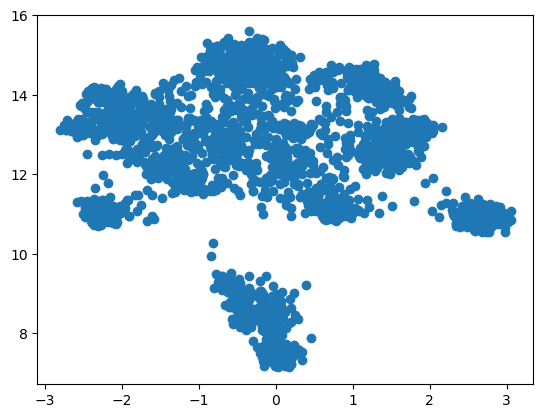

In [53]:
import matplotlib.pyplot as plt

plt.scatter(df2['x'], df2['y'])

In [28]:
# palette = sns.color_palette('viridis', clusterer.labels_.max()).as_hex()

# labels = clusterer.labels_+1

df = pd.DataFrame({    
    'id': np.arange(len(y)),
    'x': embedding[:, 0],
    'y': embedding[:, 1],
    'document': documents,
    'labels': reviewed,
    'original_indices': np.arange(len(y)),
})

df2 = pd.DataFrame({   
    'id': np.arange(len(embedding2)),
    'x': embedding2[:, 0],
    'y': embedding2[:, 1],
    'document': documents2,
    'labels': reviewed[hUmap.original_indices(2)],
    'original_indices': original_indices2,
})

df1 = pd.DataFrame({    
    'id': np.arange(len(embedding1)),
    'x': embedding1[:, 0],
    'y': embedding1[:, 1],
    'document': documents1,
    'labels': reviewed[hUmap.original_indices(1)],
    'original_indices': original_indices1,
})

config = dict(
    background_color='#FFFFFF',
    color_by='labels',
    color_map=['#4287f5', '#f57e42'] #+ palette#['#FFFF00', '#1CE6FF', '#FF34FF', '#FF4A46', '#008941', '#006FA6', '#A30059', '#FFDBE5', '#7A4900', '#0000A6']
)

# scatter = jscatter.Scatter(data=df, x='x', y='y', **config)
# scatter.show()
# scatter1 = jscatter.Scatter(data=df1, x='x', y='y', **config)
scatter2 = jscatter.Scatter(data=df2, x='x', y='y', **config)
scatter.show()

# jscatter.link([scatter2, scatter1, scatter], rows=1, row_height=640, match_by='original_indices')

In [33]:
df2 = pd.DataFrame({   
    'id': np.arange(len(embedding2)),
    'x': embedding2[:, 0],
    'y': embedding2[:, 1],
    'document': documents2,
    'labels': reviewed[hUmap.original_indices(2)],
    'original_indices': original_indices2,
})
df2.to_csv('level2.csv', index=False)

In [1]:
import jscatter
import pandas as pd

df2 = pd.read_csv('level2.csv')

config = dict(
    background_color='#FFFFFF',
    color_by='labels',
    height=800,
    color_map=['#4287f5', '#f57e42'] #+ palette#['#FFFF00', '#1CE6FF', '#FF34FF', '#FF4A46', '#008941', '#006FA6', '#A30059', '#FFDBE5', '#7A4900', '#0000A6']
)

In [2]:
scatter2 = jscatter.Scatter(data=df2, x='x', y='y')
scatter2.color(by='labels')
scatter2.height(480)
scatter2.background('black')
scatter2.show()

In [10]:
df2.iloc[scatter2.selection()]

,id,x,y,document,labels,original_indices
24490,24490,6.625843,0.732435,great social app,0,1168078
33272,33272,6.654729,0.769761,Good social app,0,1167549
32360,32360,6.687142,0.798526,Great social app,0,1168077
21642,21642,6.638833,0.750812,Great social app,0,1168059
53890,53890,6.643660,0.743374,very nice social app,0,1165934
...,...,...,...,...,...,...
49699,49699,6.525607,0.619365,I think this is best social media app I like i...,0,1164475
19283,19283,6.551891,0.619656,Very good social media App,0,1163777
14960,14960,6.549971,0.607071,Amazing social media app,0,1162823
37436,37436,6.557255,0.623509,Great social media app,0,1163920


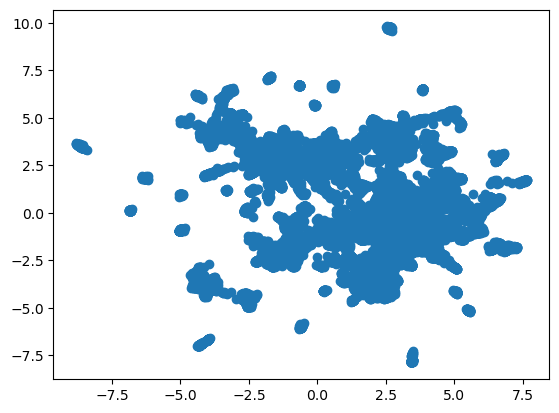

In [9]:
import matplotlib.pyplot as plt

plt.scatter(df2['x'], df2['y'])

In [20]:
random_selection = np.array(indices)[scatter.selection()]
filtereddf = pd.DataFrame({
    'indices': random_selection
})
filtereddf.shape

(1403644, 1)

In [21]:
filtereddf.to_csv('filtered_indices.csv', index=False)


In [30]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))